# Homework 4: Vector Space Models

## Due Date: Jun 12th
## Total Points: 76 (+ 15 extra credit)
- **Overview**: In this assignment you will implement many of the things you learned in [Chapter 6 of the textbook](https://web.stanford.edu/~jurafsky/slp3/6.pdf). If you haven't read it yet, now would be a good time to do that.  We'll wait.  Done?  Great, let's move on.
    
    We will provide a corpus of Shakespeare plays, which you will use to create a term-document matrix and a term-context matrix. You'll implement a selection of the weighting methods and similarity metrics defined in the textbook. Ultimately, your goal is to use the resulting vectors to measure how similar Shakespeare plays are to each other, and to find words that are used in a similar fashion. All (or almost all) of the code you write will be direct implementations of concepts and equations described in [Chapter 6, sections 6.3-6.7](https://web.stanford.edu/~jurafsky/slp3/6.pdf).

    *All difficulties are easy when they are known.*
- **Delieverables:**
    - Your implementations for the functions in the skeleton code (this notebook)
    - Write Up (include this in a separate report.pdf) (Manually Graded)
      - answers to questions: 5, and optional Extra Credit


- **Grading**: We will use the auto-grading system called `PennGrader`. To complete the homework assignment, you should implement anything marked with `#TODO` and run the cell with `#PennGrader` note. **There will be no hidden tests in this assignment.** In other words, you will know your score once you finish all the `#TODO` and run all the `#PennGrader` tests!


## Recommended Readings

- [Vector Semantics](https://web.stanford.edu/~jurafsky/slp3/6.pdf). Dan Jurafsky and James H. Martin. Speech and Language Processing (3rd edition draft)
- [From Frequency to Meaning: Vector Space Models of Semantics](https://www.jair.org/media/2934/live-2934-4846-jair.pdf). Peter D. Turney and Patrick Pantel. Journal of Artificial Intelligence Research 2010
- [Paraphrasing for Style](http://www.aclweb.org/anthology/C12-1177) Wei Xu, Alan Ritter, Bill Dolan, Ralph Grisman, and Colin Cherry. Coling 2012
- [Evaluation methods for unsupervised word embeddings](http://www.aclweb.org/anthology/D15-1036) Tobias Schnabel, Igor Labutov, David Mimno, Thorsten Joachims. EMNLP 2015
- [Community Evaluation and Exchange of Word Vectors at wordvectors.org.](http://www.aclweb.org/anthology/P14-5004) Manaal Faruqui and Chris Dyer. ACL demos 2014

## FAQs

- When finding the top 10 similar items for a given target element, should I count the target element?  
    *No, do not count the target element.*

- How can I represent a character as a vector for calculating similarity?  
    *One reasonable way would be to do it much in the same way as for plays. You would just need to write code to segment out each character as the given code did for each play.*

- What kind of analysis can I perform on the female and male Shakespearean characters for the report?  
    *There can be various ways to go about this. You can look at PCA projections of the vectors representing the characters in the plays to see if the men and women cluster in distinct areas that are demarcated. Or you can look at the similarity scores among women, among men and compare it to the similarity scores between men and men to see if it is significantly different. To account for outliers, you can use averages in this case. Feel free to play around with different vector representations and different similarity measures.*

- How can I improve the performance and efficiency of my code?  
    *Try to use vectorized code wherever possible instead of using loops. You can refer to this resource on [vectorized code](http://www.cs.cornell.edu/courses/cs1112/2015sp/Exams/exam2/vectorizedCode.pdf).*

- How many documents should I consider for reporting similarity scores in the writeup?  
    *You need not report similarity scores for every pair of documents. A subset of similarity scores should be sufficient. For instance, you can include the top 10 of one or two documents.*

- How can I compute the similarity scores on SimLex999 data set, and compute their correlation with human judgments using Kendall's Tau?  
    *You can use simlex data to get a ranking list with your model and calculate the number of concordant and discordant pairs. You can refer to this resource on [Kendall’s Tau](https://www.statisticshowto.datasciencecentral.com/kendalls-tau/).*

## To get started, **make a copy** of this colab notebook into your google drive!

**Understanding Vector Space:**

A vector space is a fundamental concept in mathematics and computer science that provides a way to represent and manipulate objects that have both magnitude and direction. In the context of Natural Language Processing (NLP), we use vector spaces to represent words, documents, or other entities as points in a high-dimensional space.


Vectors:
A vector is an object that has both magnitude (length) and direction.
In NLP, we often represent words or documents as vectors in a high-dimensional space.

Dimensions:
The dimensions of a vector space correspond to the features or characteristics that we use to describe the objects.
For example, in a term-document matrix, each dimension could represent the frequency of a specific word in a document.

Vector Representation:
Each word or document can be represented as a point (vector) in this high-dimensional space.
The position of the point is determined by the values of its features (e.g., word frequencies).

Similarity and Distance:
The similarity between vectors can be measured using various metrics, such as cosine similarity.
Cosine similarity measures the cosine of the angle between two vectors, providing a way to quantify how similar two words or documents are based on their context or content.

Applications:
By representing words and documents as vectors, we can perform various analyses, such as finding similar words, clustering documents, or detecting anomalies.
This representation helps in understanding relationships and patterns in the data.

## Setup 1: PennGrader Setup [4 points]

In [ ]:
## DO NOT CHANGE ANYTHING, JUST RUN
%%capture
!pip install penngrader-client

In [ ]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [ ]:
!cat notebook-config.yaml


grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'


In [ ]:
from penngrader.grader import *

## TODO - Start
STUDENT_ID = 62502470 # YOUR PENN-ID GOES HERE AS AN INTEGER#
## TODO - End

SECRET = STUDENT_ID
grader = PennGrader('notebook-config.yaml', 'CIS5300_OL_23Su_HW4', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 62502470

Make sure this correct or we will not be able to store your grade


In [ ]:
# check if the PennGrader is set up correctly
# do not chance this cell, see if you get 4/4!
name_str = 'Rui Jiang'
grader.grade(test_case_id = 'name_test', answer = name_str)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Setup 2: Dataset / Packages
- **Run the following cells without changing anything!**
- [Loading dataset from huggingface](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html#from-local-files)

In [ ]:
import os
import csv
import subprocess
import re
import random
import numpy as np
from dill.source import getsource

In [ ]:
!gdown 1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ # https://drive.google.com/file/d/1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ/view?usp=share_link
!gdown 1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3 # https://drive.google.com/file/d/1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3/view?usp=share_link
!gdown 1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP # https://drive.google.com/file/d/1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ
To: /content/play_names.txt
100% 550/550 [00:00<00:00, 2.33MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3
To: /content/vocab.txt
100% 184k/184k [00:00<00:00, 97.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP
To: /content/will_play_text.csv
100% 10.3M/10.3M [00:00<00:00, 24.3MB/s]


In [ ]:
######### Helper Functions - DO NOT CHANGE #########
def read_in_shakespeare():
	'''Reads in the Shakespeare dataset processesit into a list of tuples.
		 Also reads in the vocab and play name lists from files.

	Each tuple consists of
	tuple[0]: The name of the play
	tuple[1] A line from the play as a list of tokenized words.

	Returns:
		tuples: A list of tuples in the above format.
		document_names: A list of the plays present in the corpus.
		vocab: A list of all tokens in the vocabulary.
	'''

	tuples = []

	with open('will_play_text.csv') as f:
		csv_reader = csv.reader(f, delimiter=';')
		for row in csv_reader:
			play_name = row[1]
			line = row[5]
			line_tokens = re.sub(r'[^a-zA-Z0-9\s]', ' ', line).split()
			line_tokens = [token.lower() for token in line_tokens]

			tuples.append((play_name, line_tokens))

	with open('vocab.txt') as f:
		vocab =  [line.strip() for line in f]

	with open('play_names.txt') as f:
		document_names =  [line.strip() for line in f]

	return tuples, document_names, vocab

def get_row_vector(matrix, row_id):
	return matrix[row_id, :]

def get_column_vector(matrix, col_id):
	return matrix[:, col_id]
######### Helper Functions - DO NOT CHANGE #########

# Section 1: Term-Document Matrix [14 points]


## 1.1 Creating Term-Document Matrix [10 points]

You will write code to compile a term-document matrix for Shakespeare's plays, following the description in the textbook.

> In a *term-document matrix*, each row represents a word in the vocabulary and each column represents a document from some collection. The figure below shows a small selection from a term-document matrix showing the occurrence of four words in four plays by Shakespeare. Each cell in this matrix represents the number of times a particular word (defined by the row) occurs in a particular document (defined by the column). Thus *clown* appeared 117 times in *Twelfth Night

|             | As You Like It |  Twelfth Night  | Julias Caesar | Henry V |
| :---------: |:--------------:| :-------------: | :----------:  | :-----: |
| **battle**	| 1 | 1 | 8 | 15 |
| **soldier**	| 2 | 2 | 12 | 36 |
| **fool**		| 37 | 58 | 1 | 5 |
| **crown**		| 5 | 117 | 0 | 0 |

The dimensions of your term-document matrix will be the number of documents $D$ (in this case, the number of Shakespeare's plays that we give you in the corpus by the number of unique word types $\|V\|$ in that collection.   The columns represent the documents, and the rows represent the words, and each cell represents the frequency of that word in that document.

- **Problem 1.1: Term Document Matrix** [10 points]

    In your code you will write a function to `create_term_document_matrix`.  This will let you be the hit of your next dinner party by being able to answer trivia questions like *how many words did Shakespeare use?*, which may give us a hint to the answer to *How many words did Shakespeare know?*  The table will also tell you how many words Shakespeare used only once.  Did you know that there's a technical term for that?  In corpus linguistics they are called [*hapax legomena*](https://en.wikipedia.org/wiki/Hapax_legomenon), but I prefer the term *singleton*, because I don't like snooty Greek or Latin terms.


In [ ]:
tuples, document_names, vocab = read_in_shakespeare()

In [ ]:
len(tuples)

111396

In [ ]:
# tuple[0] is document name, tuple[1] is A line from the play as a list of tokenized words.
# sample
"""
[('Henry VI Part 3',
  ['york', 'cannot', 'speak', 'unless', 'he', 'wear', 'a', 'crown']),
 ('Henry VI Part 3',
  ['a', 'crown', 'for', 'york', 'and', 'lords', 'bow', 'low', 'to', 'him']),
 ('Henry VI Part 3',
  ['hold', 'you', 'his', 'hands', 'whilst', 'i', 'do', 'set', 'it', 'on']),
 ('Henry VI Part 3', ['putting', 'a', 'paper', 'crown', 'on', 'his', 'head']),
 ('Henry VI Part 3',
  ['ay', 'marry', 'sir', 'now', 'looks', 'he', 'like', 'a', 'king']),
 ('Henry VI Part 3',
  ['ay', 'this', 'is', 'he', 'that', 'took', 'king', 'henry', 's', 'chair']),
 ('Henry VI Part 3',
  ['and', 'this', 'is', 'he', 'was', 'his', 'adopted', 'heir']),
 ('Henry VI Part 3',
  ['but', 'how', 'is', 'it', 'that', 'great', 'plantagenet'])]
"""
tuples[10052:10060]

[('Henry VI Part 3',
  ['york', 'cannot', 'speak', 'unless', 'he', 'wear', 'a', 'crown']),
 ('Henry VI Part 3',
  ['a', 'crown', 'for', 'york', 'and', 'lords', 'bow', 'low', 'to', 'him']),
 ('Henry VI Part 3',
  ['hold', 'you', 'his', 'hands', 'whilst', 'i', 'do', 'set', 'it', 'on']),
 ('Henry VI Part 3', ['putting', 'a', 'paper', 'crown', 'on', 'his', 'head']),
 ('Henry VI Part 3',
  ['ay', 'marry', 'sir', 'now', 'looks', 'he', 'like', 'a', 'king']),
 ('Henry VI Part 3',
  ['ay', 'this', 'is', 'he', 'that', 'took', 'king', 'henry', 's', 'chair']),
 ('Henry VI Part 3',
  ['and', 'this', 'is', 'he', 'was', 'his', 'adopted', 'heir']),
 ('Henry VI Part 3',
  ['but', 'how', 'is', 'it', 'that', 'great', 'plantagenet'])]

In [ ]:
document_names[0:5]

['Henry IV',
 'Alls well that ends well',
 'Loves Labours Lost',
 'Taming of the Shrew',
 'Antony and Cleopatra']

In [ ]:
vocab[1:10]

['tribe',
 'success',
 'mood',
 'pipes',
 'friday',
 'scaring',
 'lovers',
 'hue',
 'umpire']

In [ ]:
vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
vocab_to_id

{'disliken': 0,
 'tribe': 1,
 'success': 2,
 'mood': 3,
 'pipes': 4,
 'friday': 5,
 'scaring': 6,
 'lovers': 7,
 'hue': 8,
 'umpire': 9,
 'allays': 10,
 'islands': 11,
 'mandrake': 12,
 'trims': 13,
 'fleming': 14,
 'dashes': 15,
 'vetches': 16,
 'nobleman': 17,
 'entomb': 18,
 'roussi': 19,
 'ruptures': 20,
 'vulgo': 21,
 'couplement': 22,
 'overfar': 23,
 'cuckolds': 24,
 'yells': 25,
 'dislocate': 26,
 'teems': 27,
 'dreamt': 28,
 'perdu': 29,
 'heartbreaking': 30,
 'fenton': 31,
 'enticements': 32,
 'duff': 33,
 'gales': 34,
 'wive': 35,
 'skies': 36,
 'exalted': 37,
 'fervency': 38,
 'supp': 39,
 'brief': 40,
 'obdurate': 41,
 'bewept': 42,
 'decaying': 43,
 'shrives': 44,
 'thereabouts': 45,
 'convive': 46,
 'shear': 47,
 'hound': 48,
 'mortar': 49,
 'topples': 50,
 'unbar': 51,
 'swing': 52,
 'brawn': 53,
 'baiting': 54,
 'handsome': 55,
 'lust': 56,
 'shovel': 57,
 'gestures': 58,
 'particularities': 59,
 'dearth': 60,
 'fleshes': 61,
 'dig': 62,
 'outfly': 63,
 'corky': 64,
 '

In [ ]:
docname_to_id = dict(zip(document_names, range(0, len(document_names))))
docname_to_id

{'Henry IV': 0,
 'Alls well that ends well': 1,
 'Loves Labours Lost': 2,
 'Taming of the Shrew': 3,
 'Antony and Cleopatra': 4,
 'Coriolanus': 5,
 'Hamlet': 6,
 'A Midsummer nights dream': 7,
 'Merry Wives of Windsor': 8,
 'Romeo and Juliet': 9,
 'Richard II': 10,
 'King John': 11,
 'macbeth': 12,
 'Timon of Athens': 13,
 'A Winters Tale': 14,
 'The Tempest': 15,
 'Henry VI Part 2': 16,
 'As you like it': 17,
 'Julius Caesar': 18,
 'A Comedy of Errors': 19,
 'Henry VIII': 20,
 'Measure for measure': 21,
 'Richard III': 22,
 'Two Gentlemen of Verona': 23,
 'Henry VI Part 1': 24,
 'Much Ado about nothing': 25,
 'Henry V': 26,
 'Troilus and Cressida': 27,
 'Twelfth Night': 28,
 'Merchant of Venice': 29,
 'Henry VI Part 3': 30,
 'Othello': 31,
 'Cymbeline': 32,
 'King Lear': 33,
 'Pericles': 34,
 'Titus Andronicus': 35}

In [ ]:
def create_term_document_matrix(line_tuples, document_names, vocab):
	'''Returns a numpy array containing the term document matrix for the input lines.

	Inputs:
		line_tuples: A list of tuples, containing the name of the document and
		a tokenized line from that document.
		document_names: A list of the document names
		vocab: A list of the tokens in the vocabulary

	# NOTE: THIS DOCSTRING WAS UPDATED ON JAN 24, 12:39 PM.

	Let m = len(vocab) and n = len(document_names).

	Returns:
		td_matrix: A mxn numpy array where the number of rows is the number of words
				and each column corresponds to a document. A_ij contains the
				frequency with which word i occurs in document j.
	'''

	vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
	docname_to_id = dict(zip(document_names, range(0, len(document_names))))

	# YOUR CODE HERE

	# The create_term_document_matrix function generates a term-document matrix
	# from a list of tokenized lines and their associated document names.
	# It takes three inputs: line_tuples, a list of tuples containing document names and tokenized lines; document_names,
	# a list of all document names; and vocab, a list of all unique tokens in the vocabulary.
	# You could create a mapping from tokens to their respective indices and from document names to their respective indices.
	# What about the dimensions of the matrix? --> it'd correspond to the number of unique tokens (rows) and the number of documents (columns).
	# You can then populate the matrix by iterating through the tokenized lines and updating the matrix entries to reflect the frequency of each token in each document.
	# The resulting matrix is a NumPy array where each element represents the frequency of a token in a document.
	term_doc_matrix = np.zeros((len(vocab), len(document_names)))
	for line in line_tuples:
		document_name = line[0]
		document_id = docname_to_id[document_name]
		if document_id >= len(document_names):
			print("document_id exceed document length as [{}]".format(document_id))
		sentence = line[1]
		for word in sentence:
			vocab_id = vocab_to_id[word]
			if vocab_id >= 22602:
				print("vocab_id exceed 36 as [{}]".format(vocab_id))
			term_doc_matrix[vocab_id][document_id] += 1

	return term_doc_matrix

In [ ]:
tuples, document_names, vocab = read_in_shakespeare()
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
term_doc_matrix.shape # should be (22602, 36)

(22602, 36)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q11_td_matrix', answer = term_doc_matrix[:5000, :35]) # we only check partial data

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 Use Term-Document Matrix to Compare Documents [4 points]

The term-document matrix will also let us do cool things like figure out which plays are most similar to each other, by comparing the column vectors.  We could even look for outliers to see if some plays are so dissimilar from the rest of the canon that [maybe they weren't authored by Shakespeare after all](https://en.wikipedia.org/wiki/Shakespeare_authorship_question).  

Let's begin by considering the column representing each play.  Each column is a $\|V\|$-dimensional vector.  Let's use some math to define the similarity of these vectors.   By far the most common similarity metric is the cosine of the angle between the vectors.  The cosine similarity metric is defined in Section 6.3 of the textbook.

> The cosine, like most measures for vector similarity used in NLP, is based on the dot product operator from linear algebra, also called the inner product:

> dot-product($\vec{v}, \vec{w}) = \vec{v} \cdot \vec{w} = \sum_{i=1}^{N}{v_iw_i} = v_1w_1 +v_2w_2 +...+v_Nw_N$

> The dot product acts as a similarity metric because it will tend to be high just when the two vectors have large values in the same dimensions. Alternatively, vectors that have zeros in different dimensions (orthogonal vectors) will have a dot product of 0, representing their strong dissimilarity.

> This raw dot-product, however, has a problem as a similarity metric: it favors long vectors. The vector length is defined as

> $\|\vec{v}\| = \sqrt{\sum_{i=1}^{N}{v_i^2}}$

> The dot product is higher if a vector is longer, with higher values in each dimension. More frequent words have longer vectors, since they tend to co-occur with more words and have higher co-occurrence values with each of them. The raw dot product thus will be higher for frequent words. But this is a problem; we would like a similarity metric that tells us how similar two words are regardless of their frequency.

> The simplest way to modify the dot product to normalize for the vector length is to divide the dot product by the lengths of each of the two vectors. This normalized dot product turns out to be the same as the cosine of the angle between the two vectors, following from the definition of the dot product between two vectors $\vec{v}$ and $\vec{w}$ as:

> $\vec{v} \cdot \vec{w} = \|\vec{v}\|\|\vec{w}\| cos \Theta$

> $\frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\|\|\vec{w}\|} =  cos \Theta$

> The cosine similarity metric between two vectors $\vec{v}$ and $\vec{w}$ thus can be computed

> $cosine(\vec{v}, \vec{w}) = \frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\| \|\vec{w}\|} = \frac{\sum_{i=1}^{N}{v_iw_i}}{\sqrt{\sum_{i=1}^{N}{v_i^2}} \sqrt{\sum_{i=1}^{N}{w_i^2}}} $

The cosine value ranges from 1 for vectors pointing in the same direction, through 0 for vectors that are orthogonal, to -1 for vectors pointing in opposite directions. Since our term-document matrix contains raw frequency counts, it is non-negative, so the cosine for its vectors will range from 0 to 1.  1 means that the vectors are identical, 0 means that they are totally dissimilar.  


- **Problem 1.2: Comparing plays**: Please implement `compute_cosine_similarity`, and for each play in the corpus, score how similar each other play is to it.  Which plays are the closet to each other in vector space (ignoring self similarity)?  Which plays are the most distant from each other? [4 points]


In [ ]:
def compute_cosine_similarity(vector1, vector2):
	'''Computes the cosine similarity of the two input vectors.

	Inputs:
		vector1: A nx1 numpy array
		vector2: A nx1 numpy array

	Returns:
		A scalar similarity value.
	'''

	# YOUR CODE HERE

	# In this task, you will implement a function to compute the cosine similarity
	# between the column vectors of the term-document matrix, which represents each play.
	# Cosine similarity measures the angle between two vectors, providing a value between 0 and 1,
	# where 1 indicates identical vectors and 0 indicates orthogonal vectors.
	# By computing these similarities, you can determine which plays are most similar and most dissimilar to each other based on their term frequencies.
	# This analysis can help identify plays with similar language use and potentially uncover outliers in the corpus.
	if np.linalg.norm(vector1) == 0 or np.linalg.norm(vector2) == 0:
		return 0
	return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))


In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q12_cos_sim', answer = getsource(compute_cosine_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 2: Measuring word similarity [10 points]
Next, we're going to see how we can represent words as vectors in vector space.  This will give us a way of representing some aspects of the *meaning* of words, by measuring the similarity of their vectors.

In our term-document matrix, the rows are word vectors.  Instead of a $\|V\|$-dimensional vector, these row vectors only have $D$ dimensions.  Do you think that's enough to represent the meaning of words? *(Spoiler Alert: no!)*


## 2.1 Term-Context Matrix [10 points]
Instead of using a term-document matrix, a more common way of computing word similarity is by constructing a term-context matrix (also called a word-word matrix), where columns are labeled by words rather than documents.  The dimensionality of this kind of a matrix is $\|V\|$ by $\|V\|$.  Each cell represents how often the word in the row (the target word) co-occurs with the word in the column (the context) in a training corpus.  

- **Problem 2:** For this part of the assignment, you should write the `create_term_context_matrix` function.  This function specifies the size word window around the target word that you will use to gather its contexts.  For instance, if you set that variable to be 4, then you will use 4 words to the left of the target word, and 4 words to its right for the context.  In this case, the cell represents the number of times in Shakespeare's plays the column word occurs in +/-4 word window around the row word. [10 points]

    You can now re-compute the most similar words for your test words using the row vectors in your term-context matrix instead of your term-document matrix.  What is the dimensionality of your word vectors now?  Do the most similar words make more sense than before?

In [ ]:
def create_term_context_matrix(line_tuples, vocab, context_window_size=1):
	'''Returns a numpy array containing the term context matrix for the input lines.

	Inputs:
		line_tuples: A list of tuples, containing the name of the document and
		a tokenized line from that document.
		vocab: A list of the tokens in the vocabulary

	# NOTE: THIS DOCSTRING WAS UPDATED ON JAN 24, 12:39 PM.

	Let n = len(vocab).

	Returns:
		tc_matrix: A nxn numpy array where A_ij contains the frequency with which
				word j was found within context_window_size to the left or right of
				word i in any sentence in the tuples.
	'''

	vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
	term_context_matrix = np.zeros((len(vocab), len(vocab)))

	for line_tuple in line_tuples:
		line = line_tuple[1]
		for i in range(len(line)):
			center_word = line[i]
			if center_word not in vocab_to_id.keys():
				continue
			row_id = vocab_to_id[center_word]

			left = max(0, i - context_window_size)
			right = min(len(line), i + context_window_size + 1)
			for context_idx in range(left, right):
				if context_idx != i:
					context_word = line[context_idx]
					if context_word not in vocab_to_id.keys():
						continue
					context_word_idx = vocab_to_id[context_word]
					term_context_matrix[row_id][context_word_idx] += 1

	# YOUR CODE HERE

	# In this part of the assignment, you will write a function called create_term_context_matrix to construct a term-context matrix,
	# also known as a word-word matrix. Unlike the term-document matrix, where rows represent words and columns represent documents,
	# a term-context matrix represents how often each word (target word) co-occurs with other words (context words) within
	# a specified window in a corpus.
	# This function will help us better understand word similarity based on their context. Specifically, you will:

	# 1. Create a matrix where both rows and columns are labeled by words from the vocabulary.
	# 2. Populate the matrix with the frequency counts of words co-occurring within a given context window around each target word.
	# 3. For example, if the context window size is 4, for each word in a line, you will consider the 4 words to its left and
	# 4 words to its right as its context.
	# The dimensionality of your word vectors will now be the size of your vocabulary, providing a more nuanced representation
	# of word meaning.

	return term_context_matrix

In [ ]:
term_context_matrix = create_term_context_matrix(tuples, vocab, context_window_size = 2)
term_context_matrix.shape # should be (22602, 22602)

(22602, 22602)

In [ ]:
# PennGrader - DO NOT CHANGE
test_cases = [
    [0, 0], # disliken, tribe
    [1317, 5124], # the, sword
    [15363, 10070], # love, you
    [4601, 15242], # good, night
    [8961, 6221], # hope, not
]

test_entries = [term_context_matrix[i, j] for i, j in test_cases]
grader.grade(test_case_id = 'test_q2_term_context_matrix', answer = test_entries)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 3: Weighting terms [28 points]
Your term-context matrix contains the raw frequency of the co-occurrence of two words in each cell.  Raw frequency turns out not to be the best way of measuring the association between words.  There are several methods for weighting words so that we get better results.  You should implement two weighting schemes:

* Positive pointwise mutual information (PPMI)
* Term frequency inverse document frequency (tf-idf)

These are defined in Section 6.2 of the textbook.

*Warning, calculating PPMI for your whole $\|V\|$-by-$\|V\|$ matrix might be slow. Our intrepid TA's implementation for PPMI takes about 10 minutes to compute all values. She always writes perfectly optimized code on her first try. You may improve performance by using matrix operations a la MATLAB.*

In [ ]:
# In this part of the assignment, you will implement two weighting schemes—Positive Pointwise Mutual Information (PPMI) and
# Term Frequency-Inverse Document Frequency (tf-idf)—to improve the way we measure word associations in a term-context matrix and a term-document matrix, respectively.

# Why Weighting Schemes?

# Raw Frequency Limitations:
# Using raw frequency to measure word associations often leads to suboptimal results. Frequent words tend to have high counts, which can overshadow
# less frequent but potentially more meaningful associations.

# Positive Pointwise Mutual Information (PPMI):
# PPMI is a method that highlights how much more often words co-occur than we would expect by chance. It reduces the influence of
# very frequent words by comparing the actual co-occurrence with the expected co-occurrence, thus emphasizing meaningful associations.
# In this task, you will compute the PPMI matrix from a given term-context matrix. This involves calculating the pointwise mutual information (PMI)
# and then converting it to PPMI by setting negative PMI values to zero.

# Term Frequency-Inverse Document Frequency (tf-idf):
# tf-idf is a weighting scheme that balances term frequency (how often a word appears in a document) with inverse document frequency
# (how common or rare a word is across all documents). This approach helps to highlight words that are important in a document but not too common in the overall corpus.
# You will transform the term-document matrix using tf-idf weighting, making it more effective for tasks like document similarity or classification.

In [ ]:
# Expectations

# PPMI Matrix:
# Implement the create_PPMI_matrix function to convert a term-context matrix into a PPMI matrix.
# Use numpy operations to efficiently calculate the probabilities and PMI values, then set negative PMI values to zero to get PPMI.

# tf-idf Matrix:
# Implement the create_tf_idf_matrix function to transform a term-document matrix using tf-idf weighting.
# Calculate the inverse document frequency (idf) for each term and use it to scale the term frequencies.
# By applying these weighting schemes, you will improve the quality of the word vectors, making them more suitable for measuring word associations and document similarities.

## 3.1 Weighting Schemes [20 points]

- **Problem 3.1.1:** Implementing `create_PPMI_matrix` function [10 points]

- **Problem 3.1.2:** Implementing `create_tf_idf_matrix` function [10 points]

In [ ]:
word_count = np.sum(term_context_matrix, axis=1, keepdims=True)
word_count

array([[  2.],
       [ 31.],
       [135.],
       ...,
       [  4.],
       [  4.],
       [ 86.]])

In [ ]:
neighbours_count = np.sum(term_context_matrix, axis=0, keepdims=True)
neighbours_count

array([[  2.,  31., 135., ...,   4.,   4.,  86.]])

In [ ]:
row = np.array([1,2,3])
row

array([1, 2, 3])

In [ ]:
col = np.array([[1], [2], [3]])

In [ ]:
row @ col

array([14])

In [ ]:
def create_PPMI_matrix(term_context_matrix):
	'''Given a term context matrix, output a PPMI matrix.

	See section 6.2 in the textbook.

	Hint: Use numpy matrix and vector operations to speed up implementation.
				Please also add a small constant 1e-6 to your term_context_matrix to avoid having 0s

	Input:
		term_context_matrix: A nxn numpy array, where n is
				the numer of tokens in the vocab.

	Returns: A nxn numpy matrix, where A_ij is equal to the
		 point-wise mutual information between the ith word
		 and the jth word in the term_context_matrix.
	'''

	# YOUR CODE HERE
	matrix = term_context_matrix + 1e-6
	total_sum = np.sum(matrix)
	normalized_matrix = matrix / total_sum

	row_sum = np.sum(matrix, axis=1, keepdims=True)   # shape (n, 1)
	row_prob = row_sum / total_sum
	col_sum = np.sum(matrix, axis=0, keepdims=True)   # shape (1, n)
	col_prob = col_sum / total_sum

	denominator = row_prob @ col_prob

	with np.errstate(divide='ignore'):
		pmi = np.log2(normalized_matrix / denominator)

	pmi[pmi < 0] = 0

	return pmi

def create_tf_idf_matrix(term_document_matrix):
	"""Given the term document matrix, output a tf-idf weighted version.

	See section 6.2 in the textbook, but note the log10 info below

	Hint: Use numpy matrix and vector operations to speed up implementation.

	We use Log10 for TF-IDF, but only apply the log10 to idf, not tf.
	tf should be  `tf = term_document_matrix`

	Input:
		term_document_matrix: Numpy array where each column represents a document
		and each row, the frequency of a word in that document.

	Returns:
		A numpy array with the same dimension as term_document_matrix, where
		A_ij is weighted by the inverse document frequency of document h.
	"""

	# YOUR CODE HERE
	term_frequency  = term_document_matrix.astype(np.float64)
	document_frequency = np.count_nonzero(term_frequency > 0, axis=1)

	inverse_document_frequency = np.log10((num_documents) / (document_frequency))

	tf_idf = term_frequency * inverse_document_frequency[:, np.newaxis]

	return tf_idf

In [ ]:
term_frequency  = term_doc_matrix.astype(np.float64)
num_documents = term_frequency.shape[1]
num_documents

36

- Testing `create_tf_idf_matrix`

In [ ]:
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)
tfidf_matrix.shape # should be (22602, 36)

(22602, 36)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q31_tfidf_matrix', answer = tfidf_matrix[:1001, :31]) # we only check part of the answer so that we won't blow up the RAM

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- Testing `create_PPMI_matrix`

In [ ]:
mini_vocab = ['dagger', 'run', 'the', 'bloody', 'sword'] # we only use part of the vocab so that you won't blow up the RAM
term_context_matrix = create_term_context_matrix(tuples, mini_vocab, context_window_size = 2)
PPMI_matrix = create_PPMI_matrix(term_context_matrix)
PPMI_matrix.shape # should be (5, 5)

(5, 5)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q32_ppmi_matrix', answer = PPMI_matrix)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.2 Other Similarity Measurements [8 points]
There are several ways of computing the similarity between two vectors.  In addition to writing a function to compute cosine similarity in Section 1, you should also write functions to `compute_jaccard_similarity` and `compute_dice_similarity`. You can check out the defintion of the [Jaccard measure here](https://en.wikipedia.org/wiki/Jaccard_index#Weighted_Jaccard_similarity_and_distance). And, dice similarity measure is given by (2 * J)/(J + 1) where J is Jaccard index. Please refer to this wikipedia link on [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) for more details.


- **Problem 3.2.1:** Implementing `jaccard` similarity [4 points]

In [ ]:
def compute_jaccard_similarity(vector1, vector2):
	'''Computes the cosine similarity of the two input vectors.

	Inputs:
		vector1: A nx1 numpy array
		vector2: A nx1 numpy array

	Returns:
		A scalar similarity value.
	'''
	intersection = np.sum(np.minimum(vector1, vector2))
	union = np.sum(np.maximum(vector1, vector2))
	if union == 0:
		return 1
	return intersection/union


In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q33_jaccard_sim', answer = getsource(compute_jaccard_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- **Problem 3.2.2:** Implementing `dice` similarity [4 points]

In [ ]:
def compute_dice_similarity(vector1, vector2):
	'''Computes the cosine similarity of the two input vectors.

	Inputs:
		vector1: A nx1 numpy array
		vector2: A nx1 numpy array

	Returns:
		A scalar similarity value.
	'''

	# YOUR CODE HERE
	intersection = np.sum(np.minimum(vector1, vector2))
	union = np.sum(np.maximum(vector1, vector2))
	j_index = 0
	if union == 0:
		j_index = 1
	else:
		j_index = intersection/union
	return 2 * j_index / (j_index + 1)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q34_dice_sim', answer = getsource(compute_dice_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 4: Ranking [10 points]
In this section, you will put everything together and **rank the playes and the words** based on their similarity to others.
- **Problem 4.1:** Implement `rank_plays` [5 points]

In [ ]:
# In this section, you are required to implement two functions: rank_plays and rank_words.

# The rank_plays function should take a list of document names, an index representing the target play,
# a term-document matrix, and a similarity function. It will rank all plays in the corpus by their similarity
# to the target play using the specified similarity metric and return a list of play names ordered by decreasing similarity.

# Similarly, the rank_words function should take a list of vocabulary terms, an index representing the target word, a term-context matrix,
# and a similarity function. It will rank all words in the vocabulary by their similarity to the target word using the specified similarity metric
# and return a list of words ordered by decreasing similarity.

# These functions will help identify the most similar plays and words based on their vector representations.

In [ ]:
def rank_plays(target_play_index, term_document_matrix, similarity_fn):
	''' Ranks the similarity of all of the plays to the target play.

	Inputs:
		target_play_index: The integer index of the play we want to compare all others against.
		term_document_matrix: The term-document matrix as a mxn numpy array.
		similarity_fn: Function that should be used to compared vectors for two
			documents. Either compute_dice_similarity, compute_jaccard_similarity, or
			compute_cosine_similarity.

	Returns:
		A length-n list of indices corresponding to play names,
		ordered by decreasing similarity to the play indexed by target_play_index,
		storing in a numpy array.
	'''
	m, n = term_document_matrix.shape

	# YOUR CODE HERE
	# n is the number of documents
	similarity_scores = np.zeros(n)
	target_doc_vector = term_document_matrix[:, target_play_index]
	for i in range(n):
		if i != target_play_index:
			doc_vector = term_document_matrix[:, i]
			similarity_scores[i] = similarity_fn(target_doc_vector, doc_vector)
		else:
			similarity_scores[i] = 1

	sims_sort = np.argsort(similarity_scores)
	# sims_sort = np.sort(similarity_scores)[::-1]
	sims_sort = sims_sort[::-1]
	return sims_sort

In [ ]:
# DO NOT CHANGE #
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)

In [ ]:
# Test Case - DO NOT CHANGE #
target_play = 'Richard III'
play_index = document_names.index(target_play)
target_play_ranking = rank_plays(play_index, tfidf_matrix, compute_cosine_similarity)
target_play_ranking.shape # should be a list of 36 numbers, representing the sorted similarity compared to the target play, Richard III

(36,)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q41_play_ranking', answer = target_play_ranking)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- **Problem 4.2:** Implement `rank_plays` [5 points]

In [ ]:
def rank_words(target_word_index, matrix, similarity_fn):
	''' Ranks the similarity of all of the words to the target word.

	Inputs:
		vocab: List of terms, corresponding to target_word_index rows (i.e. word corresponding
			to target_word_index[i,:] is given by vocab[i])
		target_word_index: The index of the word we want to compare all others against.
		matrix: Numpy matrix where the ith row represents a vector embedding of the ith word.
		similarity_fn: Function that should be used to compared vectors for two word
			ebeddings. Either compute_dice_similarity, compute_jaccard_similarity, or
			compute_cosine_similarity.

	Returns:
		A length-n list of indices, ordered by decreasing similarity to the
		target word indexed by word_index, storing in a numpy array.
	'''

	# YOUR CODE HERE
	target_vector = matrix[target_word_index]
	n, m = matrix.shape
	sim_scores = np.zeros(n)
	for i in range(n):
		if i != target_word_index:
			word_vector = matrix[i]
			sim_scores[i] = similarity_fn(target_vector, word_vector)
		else:
			sim_scores[i] = 1

	sims_sort = np.argsort(sim_scores)
	sims_sort = sims_sort[::-1]
	return sims_sort

In [ ]:
# Test Case - DO NOT CHANGE #
N = 6000
tmp_vocab = vocab[:N] # we only use part of the vocab so that you won't blow up the RAM
term_context_matrix = create_term_context_matrix(tuples, tmp_vocab, context_window_size = 2)
tmp_PPMI_matrix = create_PPMI_matrix(term_context_matrix)

target_word = 'sword'
i = tmp_vocab.index(target_word)

target_word_ranking = rank_words(i, tmp_PPMI_matrix, compute_cosine_similarity)

In [ ]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q42_word_ranking', answer = target_word_ranking[:5])

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 5: Free-response Questions [10 points]

In the ranking tasks, play with different vector representations and different similarity functions. **Does one combination appear to work better than another? Do any interesting patterns emerge?**

Some patterns you could touch upon (you can pick 1 aspect to answer **within your `report.pdf`**):
* The fourth column of `will_play_text.csv` contains the name of the character who spoke each line. Using the methods described above, **which characters are most similar? Least similar? **
* Shakespeare's plays are traditionally classified into [comedies, histories, and tragedies](https://en.wikipedia.org/wiki/Shakespeare%27s_plays). **Can you use these vector representations to cluster the plays?**
* Do the vector representations of **[female characters](https://en.wikipedia.org/wiki/Category:Female_Shakespearean_characters)** differ distinguishably from **[male ones](https://en.wikipedia.org/wiki/Category:Male_Shakespearean_characters)**?

In [ ]:
import os
files = os.listdir("/content/")
files

['.config',
 'notebook-config.yaml',
 'will_play_text.csv',
 'vocab.txt',
 'play_names.txt',
 'sample_data']

In [ ]:
# treat person as document
# use play_name and person to uniquely identify a personpl
person_tuples = []
person_list = []
person_name_set = set()
with open('will_play_text.csv') as f:
    csv_reader = csv.reader(f, delimiter=';')
    for row in csv_reader:
        play_name = row[1]
        person = row[4]
        line = row[5]
        line_tokens = re.sub(r'[^a-zA-Z0-9\s]', ' ', line).split()
        line_tokens = [token.lower() for token in line_tokens]
        person_name = "{}_{}".format(play_name, person)
        person_name_set.add(person_name)
        person_tuples.append((person_name, line_tokens))

person_vocab = []
with open('vocab.txt') as f:
		person_vocab =  [line.strip() for line in f]

person_list = sorted(person_name_set)

In [ ]:
person_term_doc_matrix = create_term_document_matrix(person_tuples, person_list, person_vocab)
person_term_doc_matrix.shape

(22602, 1328)

In [ ]:
# all person using cosine similarity
pairs = []
best_scores = []
_, num_person = person_term_doc_matrix.shape
for i in range(num_person):
    target_person = i
    target_vector = person_term_doc_matrix[:, i]
    sim_scores = np.zeros(num_person)
    for j in range(i):
        person_vector = person_term_doc_matrix[:, j]
        if i != j:
            sim_scores[j] = compute_cosine_similarity(target_vector, person_vector)
        else:
            sim_scores[j] = 0 # it should be 1, but I need to find the person most similar to the person. set 0 to avoid being picked.

    idx = np.argmax(sim_scores)
    matched_person = person_list[idx]
    score = sim_scores[idx]
    # print("[{}] is most similar to [{}], the sim score is {}".format(person_list[i], matched_person, score))
    pairs.append((person_list[i], matched_person))
    best_scores.append(score)

print("\n\n")
# best_idx = np.argmax(best_scores)
least_similar_arr = np.argsort(best_scores)
most_similar_arr = (np.argsort(best_scores))[::-1]
for i in range(20):
    best_idx = most_similar_arr[i]
    print("The most matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

print("\n\n")
for i in range(20):
    best_idx = least_similar_arr[i]
    print("The least matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

In [ ]:
# treat person as document
# use play_name and person to uniquely identify a person
def get_play_info(target_play_name):
    person_tuples = []
    person_list = []
    person_name_set = set()
    with open('will_play_text.csv') as f:
        csv_reader = csv.reader(f, delimiter=';')
        for row in csv_reader:
            play_name = row[1]
            if play_name == target_play_name:
                person = row[4]
                line = row[5]
                line_tokens = re.sub(r'[^a-zA-Z0-9\s]', ' ', line).split()
                line_tokens = [token.lower() for token in line_tokens]
                person_name_set.add(person)
                person_tuples.append((person, line_tokens))

    person_vocab = []
    with open('vocab.txt') as f:
            person_vocab =  [line.strip() for line in f]

    person_list = sorted(person_name_set)
    return person_tuples, person_list, person_vocab

henry_iv_tuples, herry_iv_persons, herry_iv_vocab = get_play_info("Henry IV")
henry_iv_person_term_doc_matrix = create_term_document_matrix(henry_iv_tuples, herry_iv_persons, herry_iv_vocab)
henry_iv_person_term_doc_matrix.shape

(22602, 36)

In [ ]:
# use cosine similarity

# def find_closest_persons(term_doc_matrix):
pairs = []
best_scores = []
_, num_person = henry_iv_person_term_doc_matrix.shape
for i in range(num_person):
    target_person = i
    target_vector = henry_iv_person_term_doc_matrix[:, i]
    sim_scores = np.zeros(num_person)
    for j in range(num_person):
        person_vector = henry_iv_person_term_doc_matrix[:, j]
        if i != j:
            sim_scores[j] = compute_cosine_similarity(target_vector, person_vector)
        else:
            sim_scores[j] = 0 # it should be 1, but I need to find the person most similar to the person. set 0 to avoid being picked.

    idx = np.argmax(sim_scores)
    matched_person = herry_iv_persons[idx]
    score = sim_scores[idx]
    print("[{}] is most similar to [{}], the sim score is {}".format(herry_iv_persons[i], matched_person, score))
    pairs.append((herry_iv_persons[i], matched_person))
    best_scores.append(score)

print("\n\n")
# best_idx = np.argmax(best_scores)
least_similar_arr = np.argsort(best_scores)
most_similar_arr = (np.argsort(best_scores))[::-1]
for i in range(8):
    best_idx = most_similar_arr[i]
    print("The most matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

print("\n\n")
for i in range(8):
    best_idx = least_similar_arr[i]
    print("The least matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

[] is most similar to [ARCHBISHOP OF YORK], the sim score is 0.606961456348453
[ARCHBISHOP OF YORK] is most similar to [KING HENRY IV], the sim score is 0.767105640126632
[BARDOLPH] is most similar to [Hostess], the sim score is 0.7103276341684327
[Carrier] is most similar to [VERNON], the sim score is 0.19433294466783266
[Chamberlain] is most similar to [FALSTAFF], the sim score is 0.7069653708578357
[EARL OF DOUGLAS] is most similar to [PRINCE HENRY], the sim score is 0.8230899695358793
[EARL OF WORCESTER] is most similar to [HOTSPUR], the sim score is 0.9186630618282466
[FALSTAFF] is most similar to [PRINCE HENRY], the sim score is 0.9334344176164313
[FRANCIS] is most similar to [Ostler], the sim score is 0.5172606001118717
[First Carrier] is most similar to [FALSTAFF], the sim score is 0.7418271792885565
[First Traveller] is most similar to [GLENDOWER], the sim score is 0.3750350636125841
[GADSHILL] is most similar to [PRINCE HENRY], the sim score is 0.7801492769681615
[GLENDOWER] 

In [ ]:
# use compute_dice_similarity

# def find_closest_persons(term_doc_matrix):
pairs = []
best_scores = []
_, num_person = henry_iv_person_term_doc_matrix.shape
for i in range(num_person):
    target_person = i
    target_vector = henry_iv_person_term_doc_matrix[:, i]
    sim_scores = np.zeros(num_person)
    for j in range(num_person):
        person_vector = henry_iv_person_term_doc_matrix[:, j]
        if i != j:
            sim_scores[j] = compute_dice_similarity(target_vector, person_vector)
        else:
            sim_scores[j] = 0 # it should be 1, but I need to find the person most similar to the person. set 0 to avoid being picked.

    idx = np.argmax(sim_scores)
    matched_person = herry_iv_persons[idx]
    score = sim_scores[idx]
    print("[{}] is most similar to [{}], the sim score is {}".format(herry_iv_persons[i], matched_person, score))
    pairs.append((herry_iv_persons[i], matched_person))
    best_scores.append(score)

print("\n\n")
# best_idx = np.argmax(best_scores)
least_similar_arr = np.argsort(best_scores)
most_similar_arr = (np.argsort(best_scores))[::-1]
for i in range(8):
    best_idx = most_similar_arr[i]
    print("The most matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

print("\n\n")
for i in range(8):
    best_idx = least_similar_arr[i]
    print("The least matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

[] is most similar to [Vintner], the sim score is 0.2058823529411765
[ARCHBISHOP OF YORK] is most similar to [SIR WALTER BLUNT], the sim score is 0.4161290322580645
[BARDOLPH] is most similar to [Hostess], the sim score is 0.3607085346215781
[Carrier] is most similar to [FRANCIS], the sim score is 0.0449438202247191
[Chamberlain] is most similar to [Second Carrier], the sim score is 0.32
[EARL OF DOUGLAS] is most similar to [SIR WALTER BLUNT], the sim score is 0.42535211267605627
[EARL OF WORCESTER] is most similar to [KING HENRY IV], the sim score is 0.4951503394762367
[FALSTAFF] is most similar to [PRINCE HENRY], the sim score is 0.6248453117563065
[FRANCIS] is most similar to [BARDOLPH], the sim score is 0.2629757785467128
[First Carrier] is most similar to [EARL OF DOUGLAS], the sim score is 0.32098765432098764
[First Traveller] is most similar to [Vintner], the sim score is 0.14545454545454545
[GADSHILL] is most similar to [POINS], the sim score is 0.38306451612903225
[GLENDOWER] 

In [ ]:
# use compute_jaccard_similarity

# def find_closest_persons(term_doc_matrix):
pairs = []
best_scores = []
_, num_person = henry_iv_person_term_doc_matrix.shape
for i in range(num_person):
    target_person = i
    target_vector = henry_iv_person_term_doc_matrix[:, i]
    sim_scores = np.zeros(num_person)
    for j in range(num_person):
        person_vector = henry_iv_person_term_doc_matrix[:, j]
        if i != j:
            sim_scores[j] = compute_jaccard_similarity(target_vector, person_vector)
        else:
            sim_scores[j] = 0 # it should be 1, but I need to find the person most similar to the person. set 0 to avoid being picked.

    idx = np.argmax(sim_scores)
    matched_person = herry_iv_persons[idx]
    score = sim_scores[idx]
    print("[{}] is most similar to [{}], the sim score is {}".format(herry_iv_persons[i], matched_person, score))
    pairs.append((herry_iv_persons[i], matched_person))
    best_scores.append(score)

print("\n\n")
# best_idx = np.argmax(best_scores)
least_similar_arr = np.argsort(best_scores)
most_similar_arr = (np.argsort(best_scores))[::-1]
for i in range(8):
    best_idx = most_similar_arr[i]
    print("The most matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

print("\n\n")
for i in range(8):
    best_idx = least_similar_arr[i]
    print("The least matched two persons are [{}] and the score is {}".format(pairs[best_idx], best_scores[best_idx]))

[] is most similar to [Vintner], the sim score is 0.11475409836065574
[ARCHBISHOP OF YORK] is most similar to [SIR WALTER BLUNT], the sim score is 0.26272912423625255
[BARDOLPH] is most similar to [Hostess], the sim score is 0.2200392927308448
[Carrier] is most similar to [FRANCIS], the sim score is 0.022988505747126436
[Chamberlain] is most similar to [Second Carrier], the sim score is 0.19047619047619047
[EARL OF DOUGLAS] is most similar to [SIR WALTER BLUNT], the sim score is 0.2701252236135957
[EARL OF WORCESTER] is most similar to [KING HENRY IV], the sim score is 0.32903641637125364
[FALSTAFF] is most similar to [PRINCE HENRY], the sim score is 0.45438183580229824
[FRANCIS] is most similar to [BARDOLPH], the sim score is 0.15139442231075698
[First Carrier] is most similar to [EARL OF DOUGLAS], the sim score is 0.19117647058823528
[First Traveller] is most similar to [Vintner], the sim score is 0.0784313725490196
[GADSHILL] is most similar to [POINS], the sim score is 0.2369077306

# Extra credit [15 points]

Quantifying the goodness of one vector space representation over another can be very difficult to do.  It might ultimately require testing how the different vector representations change the performance when used in a downstream task like question answering. A common way of quantifying the goodness of word vectors is to use them to compare the similarity of words with human similarity judgments, and then calculate the correlation of the two rankings.

If you would like extra credit on this assignment, you can quantify the goodness of each of the different vector space models that you produced (for instance by varying the size of the context window, picking PPMI or tf-idf, and selecting among cosine, Jaccard, and Dice).  You can calculate their scores on the [SimLex999 data set](https://www.cl.cam.ac.uk/~fh295/simlex.html), and compute their correlation with human judgments using [Kendall's Tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

- **Deliverables**:
    - **In your `report.pdf`**, explain what **experiments** you ran, and which **settings** *(i.e. size of the context window, picking PPMI or tf-idf, and selecting among cosine, Jaccard, and Dice)* had the highest correlation with human judgments.

- **Hint**:
    - For SimLex999 dataset, you only need to use `word1`, `word2`, and `SimLex999` columns, where `SimLex999` column is a **similarity rating by human beings** (ranging from 0 to 10) between `word1` and `word2`.
    - For Kendal's Tau, you can use check [this python implementation](https://www.geeksforgeeks.org/python-kendall-rank-correlation-coefficient/#) for reference.



In [ ]:
# Approach:

# 1. Prepare the Data:

# Use the SimLex999 dataset, which provides human similarity ratings for word pairs.
# Focus on the columns: word1, word2, and SimLex999 (similarity ratings by humans).

# 2. Generate Vector Representations:

# Create different term-context matrices by varying the size of the context window.
# Apply different weighting schemes like PPMI and tf-idf to these matrices.
# Compute word vectors using these weighted matrices.

# 3. Compute Similarities:

# For each pair of words in the SimLex999 dataset, calculate their similarity using different metrics (cosine, Jaccard, and Dice) based on the generated word vectors.

# 4. Calculate Correlation:

# Compare the computed similarities with human judgments from the SimLex999 dataset.
# Calculate the correlation between the model's similarity scores and human judgments using Kendall's Tau.

# 5. Report Findings:

# Run experiments with different settings and record which configurations (context window size, weighting scheme, and similarity metric) yield
# the highest correlation with human judgments.

In [ ]:
!wget https://fh295.github.io//SimLex-999.zip
!unzip SimLex-999.zip -d /content/

--2025-06-05 13:48:06--  https://fh295.github.io//SimLex-999.zip
Resolving fh295.github.io (fh295.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to fh295.github.io (fh295.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16805 (16K) [application/zip]
Saving to: ‘SimLex-999.zip’

SimLex-999.zip      100%[===================>]  16.41K  --.-KB/s    in 0.005s  

2025-06-05 13:48:06 (3.36 MB/s) - ‘SimLex-999.zip’ saved [16805/16805]

Archive:  SimLex-999.zip
   creating: /content/SimLex-999/
  inflating: /content/SimLex-999/README.txt  
  inflating: /content/SimLex-999/SimLex-999.txt  


In [ ]:
word_pair_sim_scores = dict() # key is tuple as (w1, w2), value is scores from
word_pair_list = []
word_set = set()
sim_999_scores = []
with open('/content/SimLex-999/SimLex-999.txt') as f:
    for line in f:
        tokens = line.split('\t')
        w1 = tokens[0]
        if w1 == "word1":
            continue
        w2 = tokens[1]
        word_set.add(w1)
        word_set.add(w2)
        score = tokens[3]
        word_pair_sim_scores[(w1, w2)] = score
        word_pair_list.append((w1, w2))
        sim_999_scores.append(float(score))
word_list = sorted(word_set)
word_to_id = dict(zip(word_list, range(0, len(word_list))))

In [ ]:
word_pair_list

[('word1', 'word2'),
 ('old', 'new'),
 ('smart', 'intelligent'),
 ('hard', 'difficult'),
 ('happy', 'cheerful'),
 ('hard', 'easy'),
 ('fast', 'rapid'),
 ('happy', 'glad'),
 ('short', 'long'),
 ('stupid', 'dumb'),
 ('weird', 'strange'),
 ('wide', 'narrow'),
 ('bad', 'awful'),
 ('easy', 'difficult'),
 ('bad', 'terrible'),
 ('hard', 'simple'),
 ('smart', 'dumb'),
 ('insane', 'crazy'),
 ('happy', 'mad'),
 ('large', 'huge'),
 ('hard', 'tough'),
 ('new', 'fresh'),
 ('sharp', 'dull'),
 ('quick', 'rapid'),
 ('dumb', 'foolish'),
 ('wonderful', 'terrific'),
 ('strange', 'odd'),
 ('happy', 'angry'),
 ('narrow', 'broad'),
 ('simple', 'easy'),
 ('old', 'fresh'),
 ('apparent', 'obvious'),
 ('inexpensive', 'cheap'),
 ('nice', 'generous'),
 ('weird', 'normal'),
 ('weird', 'odd'),
 ('bad', 'immoral'),
 ('sad', 'funny'),
 ('wonderful', 'great'),
 ('guilty', 'ashamed'),
 ('beautiful', 'wonderful'),
 ('confident', 'sure'),
 ('dumb', 'dense'),
 ('large', 'big'),
 ('nice', 'cruel'),
 ('impatient', 'anxious'

In [ ]:
vocab_set = set(vocab)
word_not_in_vocab = []
for word in word_list:
    if word not in vocab_set:
        word_not_in_vocab.append(word)
len(word_not_in_vocab)

224

In [ ]:
# extract word_term_to_doc_matrix from shakespeare's term_to_doc_matrix
word_to_doc_matrix = np.zeros((len(word_list), len(document_names)))
vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
for i in range(len(word_list)):
    word = word_list[i]
    if word in vocab_to_id.keys():
        word_to_doc_matrix[i] = term_doc_matrix[i].copy()
    else:
        # keep the value as 0
        pass
word_to_doc_matrix.shape

(1028, 36)

In [ ]:
# cosine similarity
cosine_sim_scores1 = []
jaccard_sim_scores1 = []
dice_sim_scores1 = []
for word_pair in word_pair_list:
    w1_id = word_to_id[word_pair[0]]
    w2_id = word_to_id[word_pair[1]]
    v1 = word_to_doc_matrix[w1_id]
    v2 = word_to_doc_matrix[w2_id]
    cosine_sim_scores1.append(compute_cosine_similarity(v1, v2))
    jaccard_sim_scores1.append(compute_jaccard_similarity(v1, v2))
    dice_sim_scores1.append(compute_dice_similarity(v1, v2))


In [ ]:
# calculate correlation
from scipy.stats import kendalltau
cosine_sim_scores1_corr, _ = kendalltau(cosine_sim_scores1, sim_999_scores)
jaccard_sim_scores1_corr, _ = kendalltau(jaccard_sim_scores1, sim_999_scores)
dice_sim_scores1_corr, _ = kendalltau(dice_sim_scores1, sim_999_scores)
(cosine_sim_scores1_corr, jaccard_sim_scores1_corr, dice_sim_scores1_corr)

(np.float64(-0.03548715103100787),
 np.float64(-0.015839803437388812),
 np.float64(-0.015839803437388812))

In [ ]:
# use tfidf_matrix
def create_my_tf_idf_matrix(term_document_matrix): # add smoothing
	"""Given the term document matrix, output a tf-idf weighted version.

	See section 6.2 in the textbook, but note the log10 info below

	Hint: Use numpy matrix and vector operations to speed up implementation.

	We use Log10 for TF-IDF, but only apply the log10 to idf, not tf.
	tf should be  `tf = term_document_matrix`

	Input:
		term_document_matrix: Numpy array where each column represents a document
		and each row, the frequency of a word in that document.

	Returns:
		A numpy array with the same dimension as term_document_matrix, where
		A_ij is weighted by the inverse document frequency of document h.
	"""

	# YOUR CODE HERE
	term_frequency  = term_document_matrix.astype(np.float64)
	document_frequency = np.count_nonzero(term_frequency > 0, axis=1)

	inverse_document_frequency = np.log10((num_documents+1) / (document_frequency+1))

	tf_idf = term_frequency * inverse_document_frequency[:, np.newaxis]

	return tf_idf
my_tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)


In [ ]:
# extract word_term_to_doc_matrix from shakespeare's term_to_doc_matrix
word_to_doc_matrix_tf_idf = np.zeros((len(word_list), len(document_names)))
vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
for i in range(len(word_list)):
    word = word_list[i]
    if word in vocab_to_id.keys():
        word_to_doc_matrix_tf_idf[i] = my_tfidf_matrix[i].copy()
    else:
        # keep the value as 0
        pass
word_to_doc_matrix_tf_idf.shape

(1028, 36)

In [ ]:
# similarity for tf_idf matrix
cosine_sim_scores_tf_idf = []
jaccard_sim_scores_tf_idf = []
dice_sim_scores_tf_idf = []
for word_pair in word_pair_list:
    w1_id = word_to_id[word_pair[0]]
    w2_id = word_to_id[word_pair[1]]
    v1 = word_to_doc_matrix_tf_idf[w1_id]
    v2 = word_to_doc_matrix_tf_idf[w2_id]
    cosine_sim_scores_tf_idf.append(compute_cosine_similarity(v1, v2))
    jaccard_sim_scores_tf_idf.append(compute_jaccard_similarity(v1, v2))
    dice_sim_scores_tf_idf.append(compute_dice_similarity(v1, v2))

from scipy.stats import kendalltau
cosine_sim_scores_tf_idf_corr, _ = kendalltau(cosine_sim_scores_tf_idf, sim_999_scores)
jaccard_sim_scores_tf_idf_corr, _ = kendalltau(jaccard_sim_scores_tf_idf, sim_999_scores)
dice_sim_scores_tf_idf_corr, _ = kendalltau(dice_sim_scores_tf_idf, sim_999_scores)
(cosine_sim_scores_tf_idf_corr, jaccard_sim_scores_tf_idf_corr, dice_sim_scores_tf_idf_corr)

(np.float64(-0.042450838943562275),
 np.float64(-0.02028911744438534),
 np.float64(-0.02028911744438534))

In [ ]:
# term_context_matrix
word_term_context_matrix_context_2 = create_term_context_matrix(tuples, word_list, context_window_size = 2)
word_term_context_matrix_context_2.shape # should be (1028, 1028)

(1028, 1028)

In [ ]:
from scipy.stats import kendalltau
def calculate_term_context_sim_score(context_window_size, word_pair_list, word_to_id, sim_999_scores):
    word_term_context_matrix_context = create_term_context_matrix(tuples, word_list, context_window_size)
    cosine_sim_scores = []
    jaccard_sim_scores = []
    dice_sim_scores = []
    for word_pair in word_pair_list:
        w1_id = word_to_id[word_pair[0]]
        w2_id = word_to_id[word_pair[1]]
        v1 = word_term_context_matrix_context[w1_id]
        v2 = word_term_context_matrix_context[w2_id]
        if np.count_nonzero(v1) == 0 and np.count_nonzero(v2):
            cosine_sim_scores.append(0)
            jaccard_sim_scores.append(0)
            dice_sim_scores.append(0)
        else:
            cosine_sim_scores.append(compute_cosine_similarity(v1, v2))
            jaccard_sim_scores.append(compute_jaccard_similarity(v1, v2))
            dice_sim_scores.append(compute_dice_similarity(v1, v2))
    cosine_sim_scores_corr, _ = kendalltau(cosine_sim_scores, sim_999_scores)
    jaccard_sim_scores_corr, _ = kendalltau(jaccard_sim_scores, sim_999_scores)
    dice_sim_scores_corr, _ = kendalltau(dice_sim_scores, sim_999_scores)
    print("context_window_size: [{}] \ncosine_sim_scores_corr: [{}] jaccard_sim_scores_corr: [{}] dice_sim_scores_corr: [{}]".format(
            context_window_size, cosine_sim_scores_corr, jaccard_sim_scores_corr, dice_sim_scores_corr))
    return context_window_size, cosine_sim_scores_corr, jaccard_sim_scores_corr, dice_sim_scores_corr

In [ ]:
cosine_final_scores = []
jaccard_final_scores = []
dice_final_scores = []
size_list = []
for size in range(1, 22):
    window_size, cosine_score, jaccard_score, dice_score = calculate_term_context_sim_score(size, word_pair_list, word_to_id, sim_999_scores)
    size_list.append(size)
    cosine_final_scores.append(cosine_score)
    jaccard_final_scores.append(jaccard_score)
    dice_final_scores.append(dice_score)

context_window_size: [1] 
cosine_sim_scores_corr: [-0.05819418006056151] jaccard_sim_scores_corr: [0.015818535854674666] dice_sim_scores_corr: [0.015818535854674666]
context_window_size: [2] 
cosine_sim_scores_corr: [-0.07834408250509266] jaccard_sim_scores_corr: [-0.040023335885229376] dice_sim_scores_corr: [-0.040023335885229376]
context_window_size: [3] 
cosine_sim_scores_corr: [-0.08103712127125638] jaccard_sim_scores_corr: [-0.04954054280127979] dice_sim_scores_corr: [-0.04954054280127979]
context_window_size: [4] 
cosine_sim_scores_corr: [-0.07266023804898424] jaccard_sim_scores_corr: [-0.04602435383660328] dice_sim_scores_corr: [-0.04602435383660328]
context_window_size: [5] 
cosine_sim_scores_corr: [-0.07847170398336822] jaccard_sim_scores_corr: [-0.05447142008878285] dice_sim_scores_corr: [-0.05447142008878285]
context_window_size: [6] 
cosine_sim_scores_corr: [-0.09022202867576139] jaccard_sim_scores_corr: [-0.06830552621226449] dice_sim_scores_corr: [-0.06830552621226449]
co

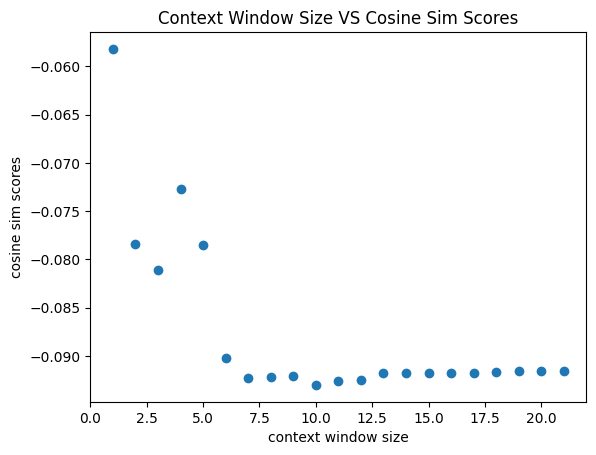

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, cosine_final_scores)
plt.xlabel("context window size")
plt.ylabel("cosine sim scores")
plt.title("Context Window Size VS Cosine Sim Scores")
plt.show()

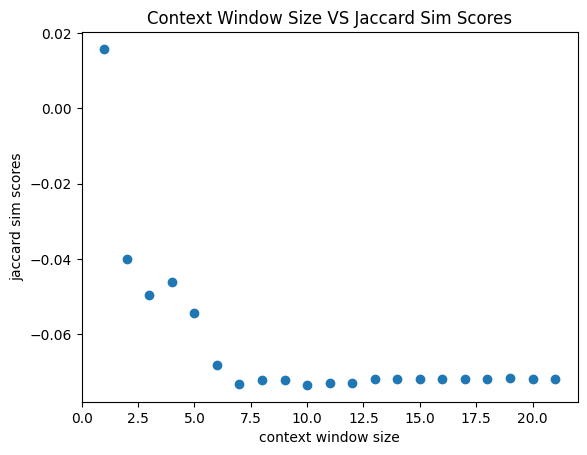

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, jaccard_final_scores)
plt.xlabel("context window size")
plt.ylabel("jaccard sim scores")
plt.title("Context Window Size VS Jaccard Sim Scores")
plt.show()

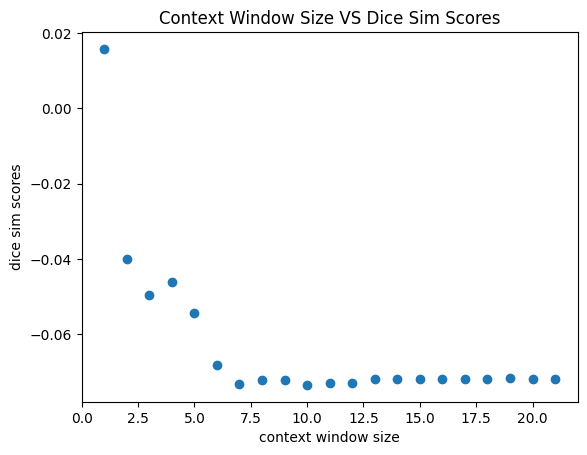

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, dice_final_scores)
plt.xlabel("context window size")
plt.ylabel("dice sim scores")
plt.title("Context Window Size VS Dice Sim Scores")
plt.show()

In [ ]:
# use PPMI
from scipy.stats import kendalltau
def calculate_term_context_sim_score_ppmi(context_window_size, word_pair_list, word_to_id, sim_999_scores):
    word_term_context_matrix_context = create_term_context_matrix(tuples, word_list, context_window_size)
    word_ppmi_matrix = create_PPMI_matrix(word_term_context_matrix_context)
    cosine_sim_scores = []
    jaccard_sim_scores = []
    dice_sim_scores = []
    for word_pair in word_pair_list:
        w1_id = word_to_id[word_pair[0]]
        w2_id = word_to_id[word_pair[1]]
        v1 = word_ppmi_matrix[w1_id]
        v2 = word_ppmi_matrix[w2_id]
        if np.count_nonzero(v1) == 0 and np.count_nonzero(v2):
            cosine_sim_scores.append(0)
            jaccard_sim_scores.append(0)
            dice_sim_scores.append(0)
        else:
            cosine_sim_scores.append(compute_cosine_similarity(v1, v2))
            jaccard_sim_scores.append(compute_jaccard_similarity(v1, v2))
            dice_sim_scores.append(compute_dice_similarity(v1, v2))
    cosine_sim_scores_corr, _ = kendalltau(cosine_sim_scores, sim_999_scores)
    jaccard_sim_scores_corr, _ = kendalltau(jaccard_sim_scores, sim_999_scores)
    dice_sim_scores_corr, _ = kendalltau(dice_sim_scores, sim_999_scores)
    print("context_window_size: [{}] \ncosine_sim_scores_corr: [{}] jaccard_sim_scores_corr: [{}] dice_sim_scores_corr: [{}]".format(
            context_window_size, cosine_sim_scores_corr, jaccard_sim_scores_corr, dice_sim_scores_corr))
    return context_window_size, cosine_sim_scores_corr, jaccard_sim_scores_corr, dice_sim_scores_corr

cosine_final_scores_ppmi = []
jaccard_final_scores_ppmi = []
dice_final_scores_ppmi = []
size_list = []
for size in range(1, 22):
    window_size, cosine_score, jaccard_score, dice_score = calculate_term_context_sim_score_ppmi(size, word_pair_list, word_to_id, sim_999_scores)
    size_list.append(size)
    cosine_final_scores_ppmi.append(cosine_score)
    jaccard_final_scores_ppmi.append(jaccard_score)
    dice_final_scores_ppmi.append(dice_score)

context_window_size: [1] 
cosine_sim_scores_corr: [0.07230385154926079] jaccard_sim_scores_corr: [0.047050007602879286] dice_sim_scores_corr: [0.047050105901729894]
context_window_size: [2] 
cosine_sim_scores_corr: [0.06469092508284802] jaccard_sim_scores_corr: [0.03533271809522389] dice_sim_scores_corr: [0.03533271809522389]
context_window_size: [3] 
cosine_sim_scores_corr: [0.05789278695633327] jaccard_sim_scores_corr: [0.025656319319712857] dice_sim_scores_corr: [0.025656319319712857]
context_window_size: [4] 
cosine_sim_scores_corr: [0.050686566305408035] jaccard_sim_scores_corr: [0.01751899293488972] dice_sim_scores_corr: [0.01751899293488972]
context_window_size: [5] 
cosine_sim_scores_corr: [0.05201824965961148] jaccard_sim_scores_corr: [0.016816835924605502] dice_sim_scores_corr: [0.016816835924605502]
context_window_size: [6] 
cosine_sim_scores_corr: [0.05190777063328707] jaccard_sim_scores_corr: [0.01387027196665948] dice_sim_scores_corr: [0.01387027196665948]
context_window_

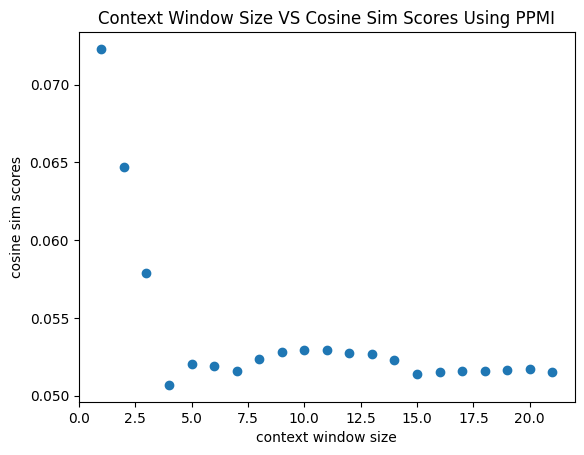

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, cosine_final_scores_ppmi)
plt.xlabel("context window size")
plt.ylabel("cosine sim scores")
plt.title("Context Window Size VS Cosine Sim Scores Using PPMI")
plt.show()

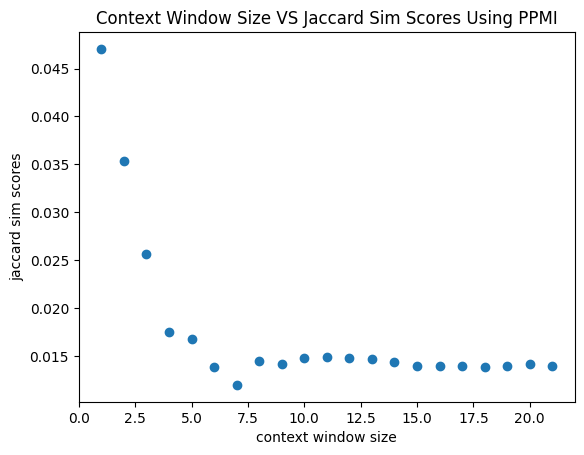

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, jaccard_final_scores_ppmi)
plt.xlabel("context window size")
plt.ylabel("jaccard sim scores")
plt.title("Context Window Size VS Jaccard Sim Scores Using PPMI")
plt.show()

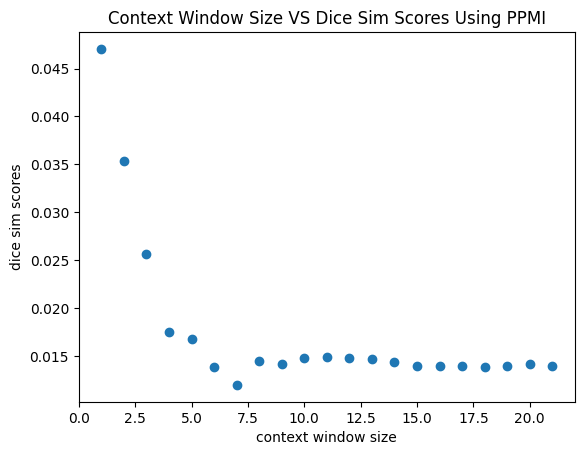

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(size_list, dice_final_scores_ppmi)
plt.xlabel("context window size")
plt.ylabel("dice sim scores")
plt.title("Context Window Size VS Dice Sim Scores Using PPMI")
plt.show()

# Submission
### Congratulation on finishing your homework! Here are the deliverables you need to submit to GradeScope
- This notebook and py file: rename to `homework4.ipynb` and `homework4.py`. You can download the notebook and py file by going to the top-left corner of this webpage, `File -> Download -> Download .ipynb/.py`
- Your `report.pdf` with answers to Section 5 and optional Extra Credit